In [1]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_fyntra = pd.read_csv("FyntraCustomerData.csv")
df_fyntra.head()


,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df_fyntra.shape

(500, 8)

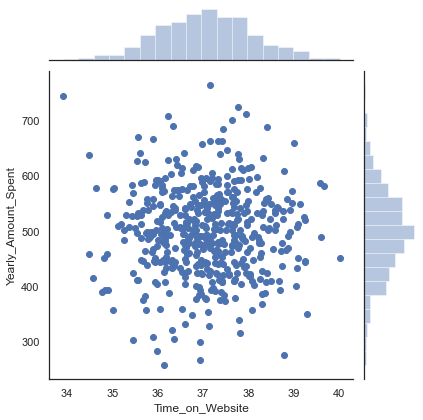

In [4]:
df_Time_web_Amount = df_fyntra.filter(
    ["Time_on_Website", "Yearly_Amount_Spent"])

sns.set(style="white", color_codes=True)
sns.color_palette()
sns.jointplot(x="Time_on_Website",
              y="Yearly_Amount_Spent", data=df_Time_web_Amount)



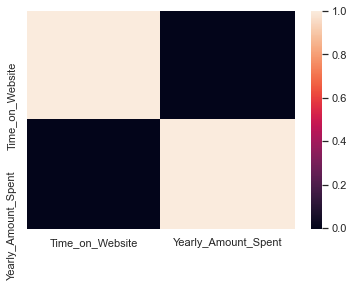

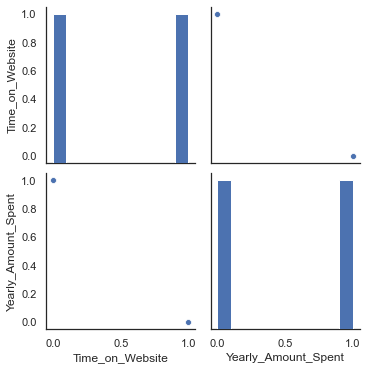

In [5]:
coff_Time_Amount = df_Time_web_Amount.corr()
sns.heatmap(coff_Time_Amount)
sns.pairplot(coff_Time_Amount)

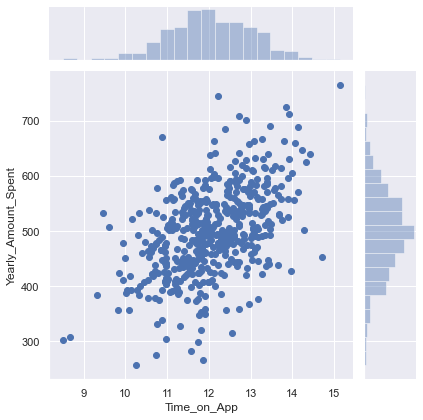

In [6]:
df_time_mob_amount=df_fyntra.filter(["Time_on_App","Yearly_Amount_Spent"])
sns.set()
sns.jointplot(x="Time_on_App",y="Yearly_Amount_Spent",data=df_time_mob_amount)

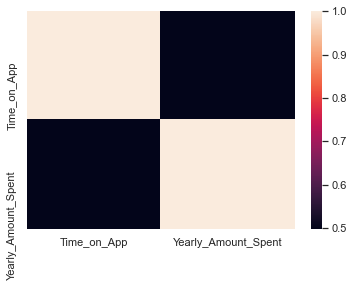

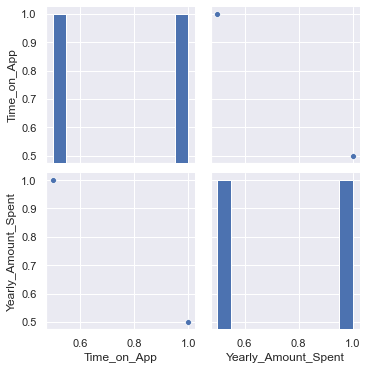

In [7]:
coff_Time_web_Amount = df_time_mob_amount.corr()
sns.heatmap(coff_Time_web_Amount)
sns.pairplot(coff_Time_web_Amount)

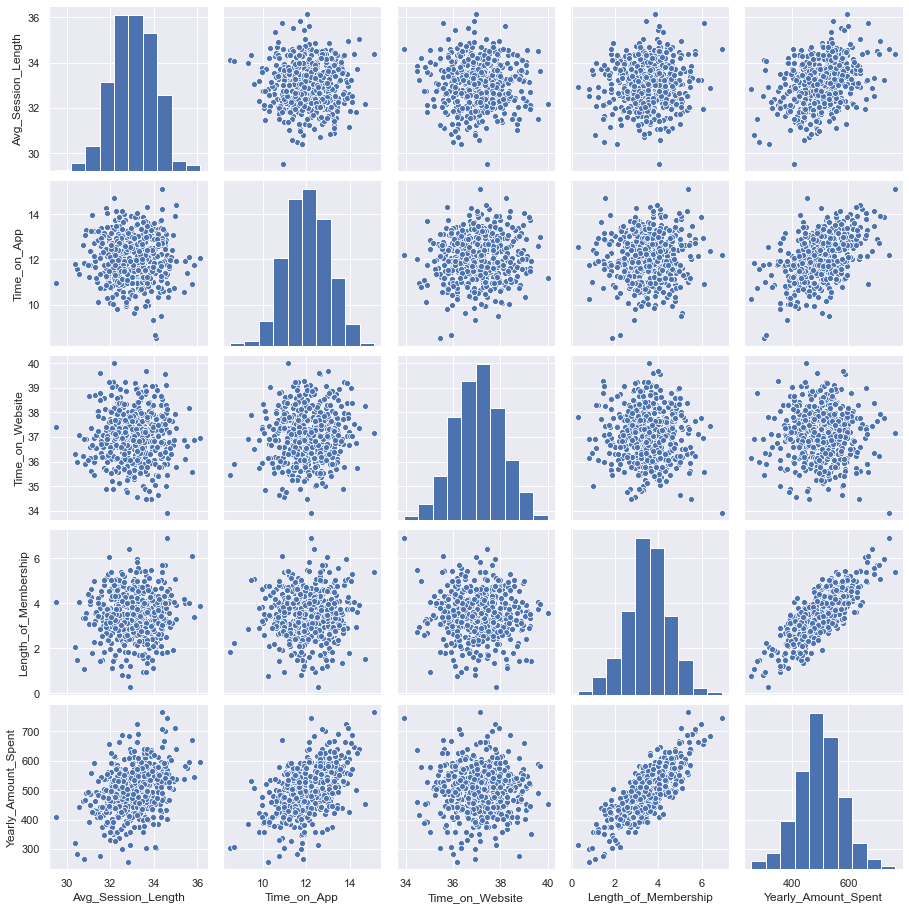

In [8]:
sns.set()
g = sns.pairplot(df_fyntra)

In [9]:
X = df_fyntra["Length_of_Membership"]
Y = df_fyntra["Yearly_Amount_Spent"]
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, random_state=85, test_size=0.3)

lin_model = LinearRegression()
lin_model.fit(pd.DataFrame(train_x), train_y)


LinearRegression()

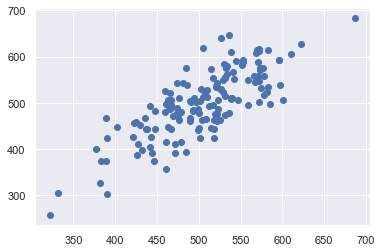

In [10]:
predicted_values = lin_model.predict(pd.DataFrame(test_x))

plt.scatter(predicted_values, test_y)
plt.show()


In [11]:
rms = sqrt(mean_squared_error(test_y, predicted_values))

In [12]:
rms

44.77732071111467